# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
# First need to upload the zip files
# importing zip files
!unzip lfw.zip

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/lfw/Steffi_Graf/._Steffi_Graf_0002.jpg  
  inflating: lfw/Steffi_Graf/Steffi_Graf_0003.jpg  
  inflating: __MACOSX/lfw/Steffi_Graf/._Steffi_Graf_0003.jpg  
  inflating: lfw/Steffi_Graf/Steffi_Graf_0004.jpg  
  inflating: __MACOSX/lfw/Steffi_Graf/._Steffi_Graf_0004.jpg  
  inflating: lfw/Steffi_Graf/Steffi_Graf_0005.jpg  
  inflating: __MACOSX/lfw/Steffi_Graf/._Steffi_Graf_0005.jpg  
  inflating: __MACOSX/lfw/._Steffi_Graf  
   creating: lfw/Stella_Keitel/
  inflating: lfw/Stella_Keitel/Stella_Keitel_0001.jpg  
   creating: __MACOSX/lfw/Stella_Keitel/
  inflating: __MACOSX/lfw/Stella_Keitel/._Stella_Keitel_0001.jpg  
  inflating: __MACOSX/lfw/._Stella_Keitel  
   creating: lfw/Stella_McCartney/
  inflating: lfw/Stella_McCartney/Stella_McCartney_0001.jpg  
   creating: __MACOSX/lfw/Stella_McCartney/
  inflating: __MACOSX/lfw/Stella_McCartney/._Stella_McCartney_0001.jpg  
  inflating: __MACOSX/lfw/._Stella_McCartney 

In [2]:
# First need to upload the zip files
!unzip dogImages.zip

Streaming output truncated to the last 5000 lines.
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03417.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03418.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03421.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03423.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03424.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03425.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03426.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03428.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03429.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03430.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03431.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03432.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03433.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03434.jpg  
  inflating: dogImages/train/048.Chihua

In [3]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/content/lfw/*/*"))
dog_files = np.array(glob("/content/dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

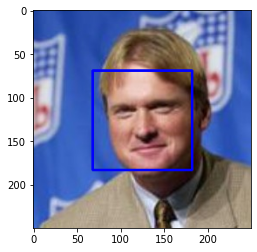

In [5]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline   
import cv2 as cv
import argparse                            

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier("/content/haarcascade_frontalface_alt.xml")

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#print(type(gray), img,human_files[0])

# find faces in image
faces = face_cascade.detectMultiScale(gray)
#print(type(faces))

# print number of faces detected in the image
#print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#print(type(cv_rgb))

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [6]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img_path = str(img_path)    
    img = cv2.imread(img_path) # Needs a string input
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [7]:
from tqdm import tqdm


human_files_short = human_files[:100] # This is a list
dog_files_short = dog_files[:100]

print(type(human_files_short),human_files_short[9])

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
import math

human_face = []
#with tqdm(total = 100) as pbar:
for h in human_files_short:
    human_face.append(face_detector(h))

dog_detect = []
for d in dog_files_short:
        dog_detect.append(face_detector(d))
        
human_true_count = sum(human_face)
dog_face_true_count = sum(dog_detect)
human_face_percentage = math.trunc((human_true_count/len(human_files_short))*100)
dog_face_percentage = math.trunc((dog_face_true_count/len(dog_files_short))*100)
        
print("Percentage of human face detected {}% ".format(human_face_percentage))
print()
print("Percentage of a dog file detected a human face {}% ".format(dog_face_percentage))



<class 'numpy.ndarray'> /content/lfw/Xiang_Huaicheng/Xiang_Huaicheng_0001.jpg
Percentage of human face detected 99% 

Percentage of a dog file detected a human face 11% 


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [8]:
### (Optional)
"""
 In this task of face detection, after googling, i have used histogram of oriented gradients technology (HOG)
Histogram of Oriented Gradients and Object Detection
"""

### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.
!pip install dlib  # I just had to install ONE TIME the dlib module
!pip install --upgrade imutils # I just had to install one time

import dlib
import cv2
import imutils
from imutils import face_utils
import numpy as np
import argparse

def HOG_face_detector(img_path):
    img_path = str(img_path)    
    img = cv2.imread(img_path) # Needs a string input

    face_detect = dlib.get_frontal_face_detector()
    

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


    rects = face_detect(gray, 1)

    return len(rects) > 0



Requirement already up-to-date: imutils in /usr/local/lib/python3.7/dist-packages (0.5.4)


In [9]:
# I used the same program code i wrote a couple of cells above. 
human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
import math

human_face = []
for h in human_files_short:
        human_face.append(HOG_face_detector(h))

dog_detect = []
for d in dog_files_short:
        dog_detect.append(HOG_face_detector(d))
        
human_true_count = sum(human_face)
dog_face_true_count = sum(dog_detect)
human_face_percentage = math.trunc((human_true_count/len(human_files_short))*100)
dog_face_percentage = math.trunc((dog_face_true_count/len(dog_files_short))*100)
        
print("Using HOG face detection, the percentage of human face detected {}% ".format(human_face_percentage))
print()
print("Using HOG face detection, the percentage of a dog file detected a human face {}% ".format(dog_face_percentage))

Using HOG face detection, the percentage of human face detected 100% 

Using HOG face detection, the percentage of a dog file detected a human face 4% 


---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [11]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

In [10]:
VGG16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [12]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    #print(len(img),img.shape)  # there are 250 rows and each element of 250 has 250 lines, 3 elements per row
# 250 (250, 250, 3)

    # transform=ToTensor() #converts a PIL image or NumPy ndarray into a FloatTensor. 
    # and scales the image’s pixel intensity values in the range [0., 1.]
        
    # large images will slow down processing
    image = img_path
    max_size = 255
    shape = None
    if max(image.size) > max_size:
        size = max_size
    else:
        size = max(image.size)
    
    if shape is not None:
        size = shape
        
   
    normalize = transforms.Normalize(
                        mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225])  
    transform_for_predictions = transforms.Compose([transforms.Resize(size), #transforms.Resize(255)
                                    transforms.CenterCrop(224),
                                    transforms.ToTensor(),normalize])
    
# discard the transparent, alpha channel (that's the :3) and add the batch dimension    
    image_tensor = transform_for_predictions(img_path)[:3,:,:].unsqueeze(0)

#    image_tensor = transform(img_path).float()
#    image_tensor = image_tensor.unsqueeze_(0)

    # move tensor to cuda because VGG is cuda
    if torch.cuda.is_available():
            image_tensor = image_tensor.cuda()

    #print(type(image_tensor), type(VGG16))

    output = VGG16(image_tensor) 
        # move tensor to cpu, for cpu processing
        
   # if torch.cuda.is_available():
  #      prediction = prediction.cpu()

  #  index = prediction.data.cpu().numpy().argmax()
    index = torch.max(output,1)[1].item()
    
    return index # predicted class index

Prediction Index 260
<PIL.Image.Image image mode=RGB size=500x333 at 0x7F6021EA0590> <class 'PIL.Image.Image'>


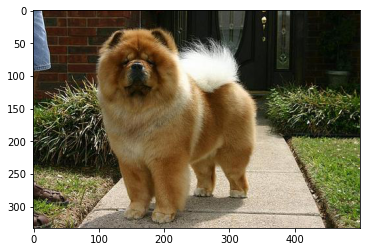

Prediction Index 232
<PIL.Image.Image image mode=RGB size=353x360 at 0x7F6021E2FFD0> <class 'PIL.Image.Image'>


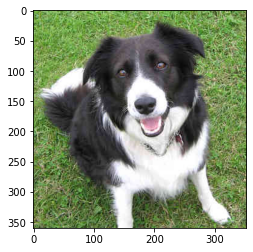

Prediction Index 225
<PIL.Image.Image image mode=RGB size=1403x1058 at 0x7F6021F588D0> <class 'PIL.Image.Image'>


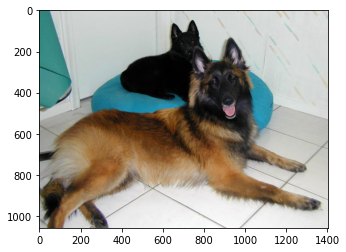

Prediction Index 224
<PIL.Image.Image image mode=RGB size=800x600 at 0x7F6021B3BF10> <class 'PIL.Image.Image'>


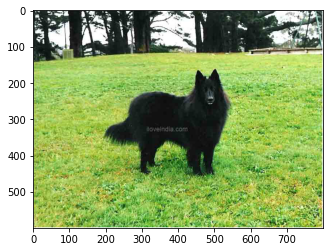

Prediction Index 219
<PIL.Image.Image image mode=RGB size=480x640 at 0x7F6021E2F410> <class 'PIL.Image.Image'>


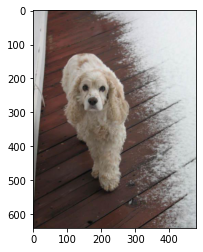

Prediction Index 266
<PIL.Image.Image image mode=RGB size=164x200 at 0x7F6021B4C5D0> <class 'PIL.Image.Image'>


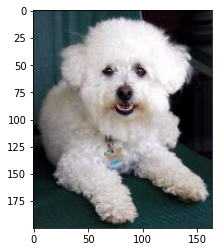

Prediction Index 257
<PIL.Image.Image image mode=RGB size=360x329 at 0x7F6021F65F50> <class 'PIL.Image.Image'>


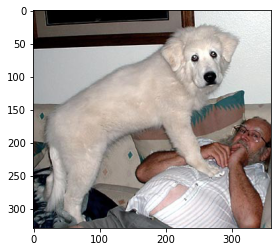

Prediction Index 268
<PIL.Image.Image image mode=RGB size=358x428 at 0x7F60219BCB10> <class 'PIL.Image.Image'>


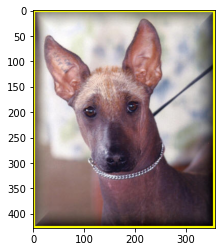

Prediction Index 236
<PIL.Image.Image image mode=RGB size=536x640 at 0x7F6021C0CAD0> <class 'PIL.Image.Image'>


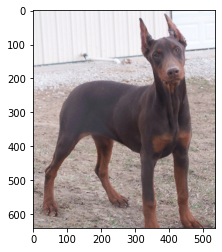

Prediction Index 205
<PIL.Image.Image image mode=RGB size=494x500 at 0x7F6021CFA1D0> <class 'PIL.Image.Image'>


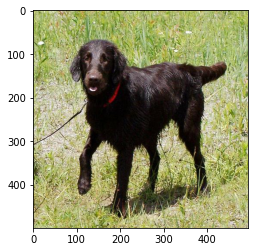

In [13]:
#from google.colab.patches import cv2_imshow
import torch
from PIL import Image
from torchvision import datasets, transforms, models
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from IPython import display

#filename = glob("/data/lfw/*/*")


#for filename in glob.iglob(root_dir + '**/*.jpg', recursive=True):
#    pas

import glob
import random

image_list = []
jpeg_list =[]
for filename in glob.glob("/content/dogImages/*/*/*"): #assuming gif
    jpeg_list.append(filename)
    im=Image.open(filename).convert("RGB")
    image_list.append(im)
    
random.shuffle(image_list)
    
image_new_list = image_list[0:10] # I will only print out 10 indexes of this list of image


for image in image_new_list:
    Prediction = VGG16_predict(image)

    print('Prediction Index',Prediction)
    print(image,type(image))
    #display(image)
    #cv2_imshow(image)
    #display.Image(image)
  #  img = Image.open(image)
    plt.imshow(image)
    plt.show()



   
#print(len(img),img.shape)  # there are 250 rows and each element of 250 has 250 lines, 3 elements per row
# 250 (250, 250, 3)

# transform=ToTensor() #converts a PIL image or NumPy ndarray into a FloatTensor. 
# and scales the image’s pixel intensity values in the range [0., 1.]


### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [14]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    
    out = VGG16_predict(img_path)
    
    if 151 <= out <= 268:  # true/false
        return True
    else:
        return False 


### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog? 
- What percentage of the images in `dog_files_short` have a detected dog? 

__Answer:__ 
What percentage of the images in `human_files_short` have a detected dog? 0%  
What percentage of the images in `dog_files_short` have a detected dog? 99%

In [15]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
from google.colab.patches import cv2_imshow
# Note, code Image.open(h) converts a class numpy string
# to a PIL image 
human_face = []
for h in human_files_short:
       # im = Image.fromarray(h)
        im=Image.open(h).convert("RGB") 
        human_face.append(dog_detector(im))

        
print()        
dog_face = []        
for d in dog_files_short:
       # im = Image.fromarray(h)
        im=Image.open(d).convert("RGB")
        dog_face.append(dog_detector(im))


human_true_count = sum(human_face)
dog_face_true_count = sum(dog_face)
human_face_percentage = math.trunc((human_true_count/len(human_files_short))*100)
dog_face_percentage = math.trunc((dog_face_true_count/len(dog_files_short))*100)
                        
print("Dog detector, the percentage of human face detected {}% ".format(human_face_percentage))
print()
print("Dog detector, the percentage of dog face detected {}% ".format(dog_face_percentage))



Dog detector, the percentage of human face detected 1% 

Dog detector, the percentage of dog face detected 100% 


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [90]:
import os
#from torchvision import datasets, DataLoader gave error that Dataloader not defined
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

data_dir = '/content/dogImages/' # need to have the '/' for correct directory find
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

training_data = os.path.join(data_dir, 'train')
test_data = os.path.join(data_dir, 'test')
valid_data = os.path.join(data_dir, 'valid')

print(type(training_data),test_data)

# large images will slow down processing
size = 224 #  imag is a square 255 pixels on each side

    
normalize = transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225])  
transform = transforms.Compose([transforms.Resize(size), #transforms.Resize(255)
                                transforms.RandomResizedCrop(224), # 224 pixels on each side
                                transforms.CenterCrop(224),
                                transforms.RandomHorizontalFlip(),
                                #transforms.RandomRotation(10),
                                transforms.ToTensor(),normalize])

train_data = datasets.ImageFolder(training_data,transform=transform)
test_data = datasets.ImageFolder(test_data,transform=transform)
valid_data = datasets.ImageFolder(valid_data,transform=transform)

print('  Number of train images: ', len(train_data))
print('  Number of test images:  ', len(test_data))
print('  Number of valid images: ', len(valid_data))

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
batch_size=20
# The batch size defines the number of samples that will be propagated through the network.
train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size,shuffle=True)
valid_dataloader = DataLoader(valid_data, batch_size=batch_size, shuffle=True)

loaders_scratch = {'train':train_dataloader, 'valid':valid_dataloader, 'test':test_dataloader}

# get classes of training datas
class_names = train_data.classes
number_classes = len(class_names)
parameter_size = number_classes
print(class_names,number_classes)
print(type(train_data),train_data,type(loaders_scratch), class_names)

<class 'str'> /content/dogImages/test
  Number of train images:  6680
  Number of test images:   836
  Number of valid images:  835
['001.Affenpinscher', '002.Afghan_hound', '003.Airedale_terrier', '004.Akita', '005.Alaskan_malamute', '006.American_eskimo_dog', '007.American_foxhound', '008.American_staffordshire_terrier', '009.American_water_spaniel', '010.Anatolian_shepherd_dog', '011.Australian_cattle_dog', '012.Australian_shepherd', '013.Australian_terrier', '014.Basenji', '015.Basset_hound', '016.Beagle', '017.Bearded_collie', '018.Beauceron', '019.Bedlington_terrier', '020.Belgian_malinois', '021.Belgian_sheepdog', '022.Belgian_tervuren', '023.Bernese_mountain_dog', '024.Bichon_frise', '025.Black_and_tan_coonhound', '026.Black_russian_terrier', '027.Bloodhound', '028.Bluetick_coonhound', '029.Border_collie', '030.Border_terrier', '031.Borzoi', '032.Boston_terrier', '033.Bouvier_des_flandres', '034.Boxer', '035.Boykin_spaniel', '036.Briard', '037.Brittany', '038.Brussels_griffon',

In [85]:
for data in train_dataloader:
  print(data)
  break

[tensor([[[[ 1.8208,  1.7694,  1.7523,  ...,  1.3242,  0.0912, -1.4329],
          [ 1.8550,  1.7865,  1.7180,  ...,  1.5468,  0.5707, -1.0219],
          [ 1.8722,  1.8379,  1.8208,  ...,  1.7009,  0.9817, -0.5938],
          ...,
          [ 0.6392,  0.5707,  0.6906,  ...,  0.7762,  0.7933,  0.9474],
          [ 0.3481,  0.4679,  0.6221,  ...,  1.0844,  1.0159,  1.0673],
          [ 1.0844,  1.0331,  0.9646,  ...,  1.0502,  0.9817,  0.9817]],

         [[ 1.9909,  1.9384,  1.9209,  ...,  1.4132,  0.1527, -1.4405],
          [ 2.0259,  1.9559,  1.8859,  ...,  1.6408,  0.6429, -0.9853],
          [ 2.0434,  2.0084,  1.9909,  ...,  1.7983,  1.0630, -0.5476],
          ...,
          [ 0.3627,  0.3102,  0.4153,  ...,  0.7129,  0.6078,  0.6078],
          [ 0.1001,  0.2052,  0.3627,  ...,  0.9580,  0.8179,  0.7654],
          [ 0.8880,  0.8179,  0.7654,  ...,  0.8004,  0.7304,  0.7304]],

         [[ 2.2391,  2.1868,  2.1694,  ...,  1.5768,  0.3393, -1.2119],
          [ 2.2740,  2.2043, 

In [91]:
print(type(train_data),train_data) #same for test_data, valid_data

<class 'torchvision.datasets.folder.ImageFolder'> Dataset ImageFolder
    Number of datapoints: 6680
    Root location: /content/dogImages/train
    StandardTransform
Transform: Compose(
               Resize(size=224, interpolation=bilinear)
               RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear)
               CenterCrop(size=(224, 224))
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?

**Answer**:
i wanted to select a feature size of 224 because large images slows down the processing, the same ways with the RandomResizeCrop and CenterCrop. While training the model, cropping helps to select the important features of the image. 


- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?

**Answer**:
Yes, i decided to augment the data. because we don't know the irrelevant patterns of the images, so augmentation on the data helps the network generalize for better performance


### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [92]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        # convolutional layer (sees 32x32x3 image tensor) # Remember the batch = 64 samples 
        self.conv1 = nn.Conv2d(3,32,3, stride=2, padding=1)
        #self.norm2d1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(32, 64, 3, stride =2,padding=1) # (3,16,3) first 3 is the RGB 3 depth layer, 
        # 16 is given so next 16 different filters is this layer is 32 until we reach 64. 
        # the last 3 is the filter kernel size (3x3) matrix of #s that modifies an image 
        # convolutional layer (sees 16x16x16 tensor) is a stack of feature maps.
        # One feature map for each filter.
        # Padding is border of pixels of zeros around an image in this case extense matrix of 1

# From Step 3
# We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are 
# slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an 
# accuracy of less than 1%. This will be the output 

        self.conv3 = nn.Conv2d(64, 128, 3, padding=1) 

   # start here 5/24     
        # max pooling layer

        self.pool = nn.MaxPool2d(2, 2)
        # linear layer (128 * 7*7 -> 500)
        self.fc1 = nn.Linear(128 * 7 * 7, 500)
        # linear layer (500 -> 133)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc2 = nn.Linear(500, parameter_size)
        # dropout layer (p=0.5)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.5)
        

    
#2nd convolutional layer To discover patterns within a pattern     
    def forward(self, x):
        ## Define forward behavior
        x = F.relu((self.conv1(x)))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        
        # flatten image input
        x = x.view(-1, 128 * 7 * 7)
        # add dropout layer
        x = self.dropout(x)
        # add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add 2nd hidden layer, with relu activation function
        x = self.fc2(x)
        
        return x
    

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

* From the transform, the size of the original image is (224,224) pixels. 
* I selected a stack of 3 convolution layers (RGB), a 3x3 filter convolutional Kernel with a paddling of 1 that gives the filter one more space to move in either direction, to find patterns in an image.
2nd and 3rd convolutional layer are used to discover patterns within a pattern.
* Next, is the Max pooling layer with a kernel size of (2x2) so the dimensionality of the input arrays that make up the image resolution has been reduced to 4x4. The filter size and stride will be (2,2). The original depth is 64. 
* Next is to build the class for the Neural Network. The inputs needs to go to two input hidden layer. The 2nd  nn.linear has the output of 30. 
* To prevent overfitting, a dropout rate of 0.5 of is used. 

* For the forward behavior of the neural network, a ReLu activation, which as an output of 0 or 1, is applied to the output of these filters to standarized their output values. This is done on each of the three convolution layer. 
* Two pool layers of 2x2 are used from self.pool(x)
* The image needs to be flatten by the view method for 1 dimension. 
* Drop outs and relu fuction are used before the output. 


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [93]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=0.001)

if use_cuda:
    criterion_scratch = criterion_scratch.cuda()

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [96]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
# I looked at this example for traing loss and valid loss
#https://github.com/udacity/deep-learning-v2-pytorch/blob/master/convolutional-neural-networks/cifar-cnn/cifar10_cnn_solution.ipynb
        model.train()
        for batch_idx, (data,target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
           # train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
                # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
        # update training loss
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data,target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data,target = data.cuda() , target.cuda()
            ## update the average validation loss
             # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
        # calculate the batch loss
            loss = criterion(output, target)
        # update average validation loss 
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
            

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
         ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            torch.save(model.state_dict(), save_path)
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'
                  .format(valid_loss_min, valid_loss))
            valid_loss_min = valid_loss

   
    # return trained model
    return model

param_epoch = 22
# train the model
model_scratch = train(param_epoch, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')
#print(model_scratch)

#torch.save(model_scratch.state_dict(), 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.549159 	Validation Loss: 4.514225
Validation loss decreased (inf --> 4.514225).  Saving model ...
Epoch: 2 	Training Loss: 4.474744 	Validation Loss: 4.440554
Validation loss decreased (4.514225 --> 4.440554).  Saving model ...
Epoch: 3 	Training Loss: 4.412697 	Validation Loss: 4.376425
Validation loss decreased (4.440554 --> 4.376425).  Saving model ...
Epoch: 4 	Training Loss: 4.364460 	Validation Loss: 4.309653
Validation loss decreased (4.376425 --> 4.309653).  Saving model ...
Epoch: 5 	Training Loss: 4.317809 	Validation Loss: 4.310872
Epoch: 6 	Training Loss: 4.250181 	Validation Loss: 4.252684
Validation loss decreased (4.309653 --> 4.252684).  Saving model ...
Epoch: 7 	Training Loss: 4.244210 	Validation Loss: 4.206989
Validation loss decreased (4.252684 --> 4.206989).  Saving model ...
Epoch: 8 	Training Loss: 4.196094 	Validation Loss: 4.180455
Validation loss decreased (4.206989 --> 4.180455).  Saving model ...
Epoch: 9 	Training Loss: 4.168381 

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [97]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.
    model.eval()
    for batch_idx, (data,target) in enumerate(loaders['test']): # this is tensor already by the dataloaders coming from datasets

        print(data)
      #  if torch.cuda.is_available():
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output,target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))
#https://viewjz0ral44olo.udacity-student-workspaces.com/notebooks/dog_project/dog_app.ipynb#Step-4:-Create-a-CNN-to-Classify-Dog-Breeds-(using-Transfer-Learning)
    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Streaming output truncated to the last 5000 lines.
          [-1.5280, -1.8431, -1.8782,  ...,  0.6954,  0.5203,  0.9755],
          ...,
          [ 1.1331,  1.1681,  1.0105,  ..., -0.3725,  0.1702,  0.6254],
          [ 0.9930,  1.1506,  1.0630,  ..., -0.0749,  0.6429,  0.4503],
          [ 0.8004,  0.7479,  0.8704,  ...,  0.2752,  0.3627,  0.4153]],

         [[-0.4275, -1.1944, -1.7347,  ..., -0.3055, -0.2358, -0.2707],
          [-1.0898, -1.6127, -1.7347,  ..., -0.4275, -0.2358, -0.0790],
          [-1.5430, -1.7347, -1.7347,  ..., -0.1138, -0.2358,  0.1999],
          ...,
          [-0.0441,  0.0779, -0.1487,  ..., -0.5495, -0.0441,  0.4439],
          [-0.2707,  0.0953, -0.0615,  ..., -0.3753,  0.3393,  0.1825],
          [-0.4798, -0.1835, -0.0964,  ..., -0.2707, -0.0092,  0.0256]]]])
tensor([[[[-1.9638, -1.9295, -1.9809,  ..., -1.9638, -2.0152, -2.0323],
          [-2.0152, -1.9809, -1.9809,  ..., -2.0323, -2.0152, -2.0152],
          [-1.9980, -1.9980, -2.0152,  ..., -1.998

---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [98]:
## TODO: Specify data loaders
import os
#from torchvision import datasets, DataLoader gave error that Dataloader not defined
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

data_dir = '/content/dogImages/' # need to have the '/' for correct directory find
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

# code transform from the CNN Architecture model

train_data = os.path.join(data_dir, 'train')
test_data = os.path.join(data_dir, 'test')
valid_data = os.path.join(data_dir, 'valid')

train_data = datasets.ImageFolder(train_data,transform=transform)
test_data = datasets.ImageFolder(test_data,transform=transform)
valid_data = datasets.ImageFolder(valid_data,transform=transform)

train_loader_transfer = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader_transfer = DataLoader(test_data, batch_size=64, shuffle=True)
valid_loader_transfer = DataLoader(valid_data, batch_size=64, shuffle=True)

data_transfer = {'train':train_loader_transfer, 'valid':valid_loader_transfer, 'test':test_loader_transfer}




### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [101]:
import torchvision.models as models
import torch.nn as nn


## TODO: Specify model architecture 
# model_transfer is the most important code, it will help predict dog breed

# Load the pretrained model from pytorch
model_transfer = models.vgg16(pretrained=True)

# print out the model structure
print(model_transfer)

# To freeze the weights in the layer
for param in model_transfer.parameters():  
    param.requires_grad = False

model_transfer.classifier = nn.Linear(2048, 133, bias=True) # output of 133 classes of dog breeds

classifier_parameters = model_transfer.classifier.parameters()

for param in classifier_parameters:
    param.requires_grad = True # Update the weights and biases

if use_cuda:
    model_transfer = model_transfer.cuda()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

	*  I made sure i was in the correct path to Collect the dataset and use dataloader
	*  Trained the model using the VGG16 architecture, use cuda for model transfer
    *  specify loss function and optimizer
    *  freezed the weights in the layer. It prevents the 
       weights and biases from being modified. It decreases training
       computation time. 
	   
  	*  Test and run the model and validate
    *  Predict for dog breed
	*  Check for accuracy


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [102]:
import torch.optim as optim

### TODO: select loss function
criterion_transfer = nn.CrossEntropyLoss()

### TODO: select optimizer for transfer learning
optimizer_transfer = optim.Adam(model_transfer.classifier.parameters(), lr=0.0001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [106]:
# train the model
n_epochs = 20
model_transfer = train(n_epochs, data_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')
torch.save(model_scratch.state_dict(), 'model_scratch.pt')
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

RuntimeError: ignored

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [ ]:
test(data_transfer, model_transfer, criterion_transfer, use_cuda)

### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [ ]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]

# Try this 5/26/2021
#train_loader_transfer.dataset.classes
def predict_breed_transfer(img_path):
    # Make these globally
    global model_transfer
    global transform_for_predictons

# if GPU is available, move the model,image to GPU
if use_cuda:
    image.cuda()
    model_transfer.cuda()
    # load the image and return the predicted breed    
    # discard the transparent, alpha channel (that's the :3) and add the batch dimension    
    image_tensor = transform_for_predictons(img_path)[:3,:,:].unsqueeze(0)

        
    model_transfer.eval()
    #idx = torch.argmax(model_transfer(image_tensor))
    # Check if this works also
    idx = torch.max(model_transfer(image_tensor),1)[1].item()
    return class_names[idx]

# **Test the dog_breed_prediction**

In [ ]:
# Testing the dog_breed_prediction
import glob
import random

image_list = []
jpeg_list =[]
for filename in glob.glob("/content/dogImages/*/*/*"): #assuming gif
    jpeg_list.append(filename)
    im=Image.open(filename).convert("RGB")
    image_list.append(im)
    
random.shuffle(image_list)
    
image_new_list = image_list[0:10] # I will only print out 10 indexes of this list of image


for image in image_new_list:
    dog_breed_prediction=predict_breed_transfer(img_path)

    print('Name of Dog Breed is {}.' .format(dog_breed_prediction))
    print(image,type(image))
    plt.imshow(image)
    plt.show()

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [ ]:
import itertools
import random
human_files_short
dog_files_short
# Input list
#files_list = human_files_short + dog_files_short
res_list = list(itertools.chain(human_files_short, dog_files_short))
res_list

random.shuffle(res_list)
res_list
# Shorten to 5 images in list
res_new_list = res_list[0:5]
res_new_list

['/content/lfw/Lance_Armstrong/Lance_Armstrong_0017.jpg',
 '/content/lfw/Sergei_Ivanov/Sergei_Ivanov_0005.jpg',
 '/content/dogImages/test/030.Border_terrier/Border_terrier_02110.jpg',
 '/content/dogImages/test/027.Bloodhound/Bloodhound_01934.jpg',
 '/content/lfw/Heath_Ledger/Heath_Ledger_0003.jpg']

In [ ]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    
   ## handle cases for a human face, dog, and neither
    if face_detector(img_path) > 0:
        breed = predict_breed_transfer(img_path)
        print('Human face resembing dog breed is ' + str(breed))
    elif dog_detector(img_path)==True:
        breed = predict_breed_transfer(img_path)
        print('Dog  breed is ' + str(breed))       
    else:
        print('It is a Non-dog, Non-Human Image.')
        


In [ ]:
import itertools
import random
human_files_short
dog_files_short
# Input list
#files_list = human_files_short + dog_files_short
res_list = list(itertools.chain(human_files_short, dog_files_short))
res_list

random.shuffle(res_list)
res_list
# Shorten to 5 images in list
res_new_list = res_list[0:5]
res_new_list

# Test algorithm

for image in res_new_list:
    Case = run_app(img_path)



### Writing a Keras algorithm to train, validate and test a model 
### using RESNET50 Check its accuracy


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

1. I started with 20 Epochs and had a test accuracy of .08%, increasing to 25 Epochs increased my test accuracy by 11%. So i know if you increase Epochs, test accuracy would increase. 

2. Adding more cnn layers would essentially increase accuracy
3. Pooling the layers would increase accuracy

__Answer:__ (Three possible points for improvement)

In [ ]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.
import numpy as np
from glob import glob

image1 = np.array(glob("/content/file1"))  # 
image2 = np.array(glob("/content/file2"))  #
image3 = np.arrary(glob("/content/file3")) #
ImageFiles = np.concatenate(image1,image2,image3)


## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3],ImageFiles[:3])):
    run_app(file)